In [0]:
#Uploading file into server

from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
import pandas as pd

#open file from google sheet
open = gspread.authorize(GoogleCredentials.get_application_default())
file_stock = open.open_by_url('https://docs.google.com/spreadsheets/d/1bUkjFZ5mbPxAKvDl80mGOZirwiQ5zdp3tO3G8nGCTCs/edit?usp=sharing')

sheet = file_stock.worksheet('Sheet1')
data = sheet.get_all_values()
df = pd.DataFrame(data)

**Show data and map into numerical value**

In [38]:
#make the table cleaner
header = df.iloc[0]
df=df[1:]
df.columns = header
df

,date,open,high,low,close
1,5/21/2019,10300,10400,10250,10300
2,5/22/2019,10325,10425,10250,10400
3,5/23/2019,10500,10500,10375,10425
4,5/24/2019,10500,10500,10200,10450
5,5/27/2019,10500,10500,10300,10425
...,...,...,...,...,...
250,5/14/2020,6125,6400,6000,6100
251,5/15/2020,6175,6275,6050,6200
252,5/18/2020,6325,6375,6250,6350
253,5/19/2020,6375,6625,6375,6525


In [0]:
import matplotlib.pyplot as plt
import statistics

#convert data object pandas into integer so we can use it easily
data_open=list(map(int,df['open']))  
data_high=list(map(int,df['high']))
data_low=list(map(int,df['low']))
data_close=list(map(int,df['close']))

**Exploratory Data Analysis**

Assuming we will use all data to analyze

In [41]:
#Find the null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 1 to 254
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    254 non-null    object
 1   open    254 non-null    object
 2   high    254 non-null    object
 3   low     254 non-null    object
 4   close   254 non-null    object
dtypes: object(5)
memory usage: 10.1+ KB


count       254
unique      138
top       10500
freq         11
Name: open, dtype: object


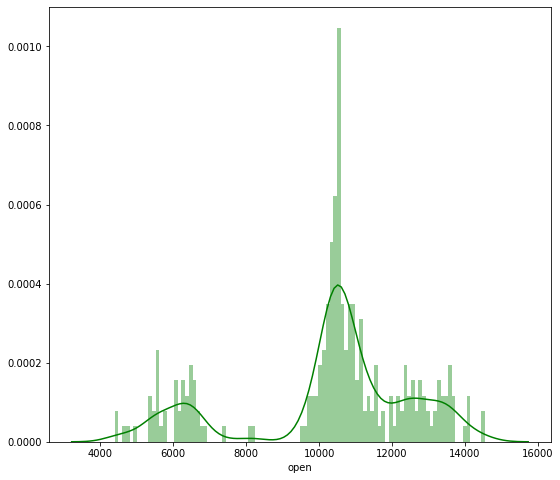

In [45]:
#Check the data distribution of open

import seaborn as sns

print(df['open'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['open'], color='g', bins=100, hist_kws={'alpha': 0.4});

count       254
unique      146
top       10500
freq         10
Name: high, dtype: object


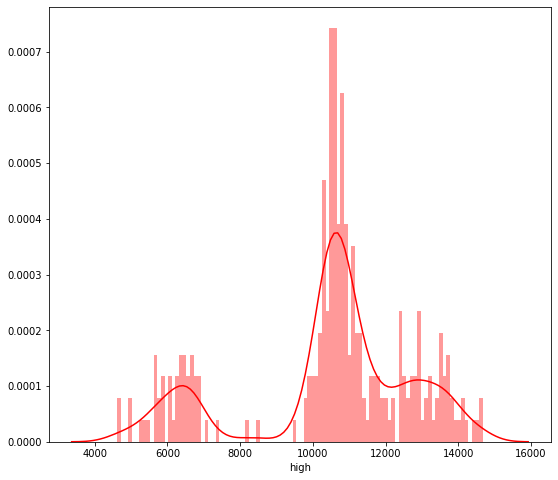

In [46]:
print(df['high'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['high'], color='r', bins=100, hist_kws={'alpha': 0.4});

count       254
unique      129
top       10500
freq         12
Name: low, dtype: object


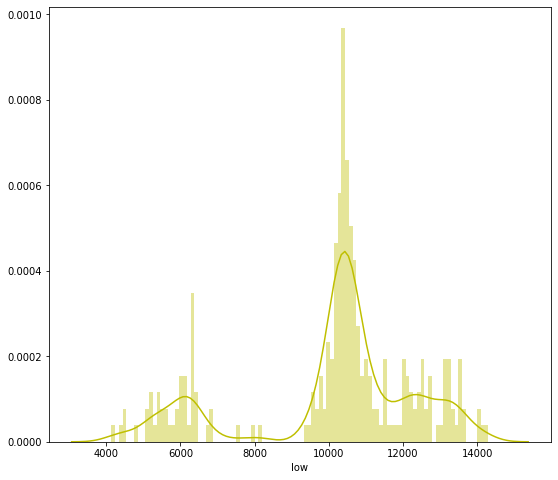

In [48]:
print(df['low'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['low'], color='y', bins=100, hist_kws={'alpha': 0.4});

count       254
unique      140
top       10400
freq         11
Name: close, dtype: object


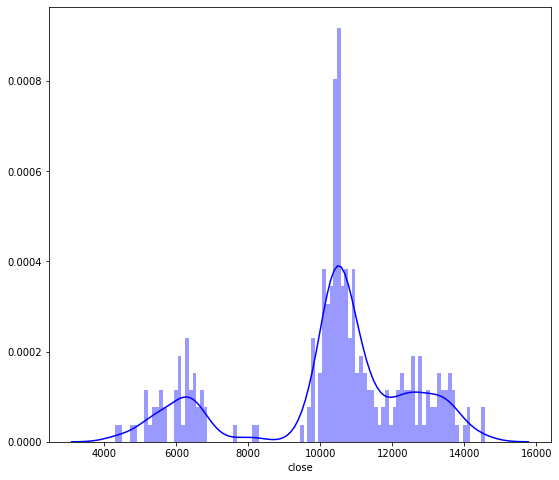

In [49]:
print(df['close'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['close'], color='b', bins=100, hist_kws={'alpha': 0.4});

**Reading the Exploration Result**

Based on data above, we can see that there is no 'missing value' in the data so we don't need to fill the data using back up data (using mean, or something). If we see the histogram each category, the pattern is the same. Meaning the behaviour of open, high, low, and close stock data is the same.

In [58]:
#Find the statistic descriptive

print('Average : ', statistics.mean(data_open))
print('Median : ', statistics.median(data_open))
print('Standart Deviation : ', statistics.stdev(data_open))

Average :  10302.854330708662
Median :  10550.0
Standart Deviation :  2342.5970821651176


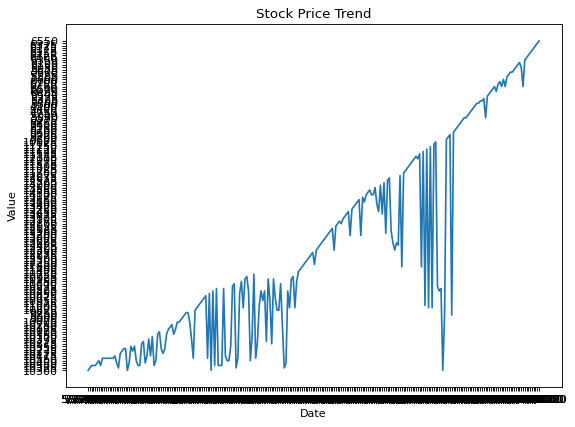

In [63]:
#Plot the time series of data open (example)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


plt.plot(df['date'], df['open'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Stock Price Trend')
plt.show()

We can see from the graph above, the trend of stock price is increasing day by day, eventhough there is a low value.Also, we couldn't plot the value well because the value is too large of range and also too broad in all interval.

**Summary**

From the data stock price, we can see that the trend is increasing day by day and in all category has the same pattern.